<a href="https://colab.research.google.com/github/mohamedyosef101/harvardx-python-for-research/blob/main/Network%20Analysis/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of NetworkX

In [67]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli
from collections import Counter

In [68]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from(['u', 'v'])
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [69]:
G.add_edge(1, 2)
G.add_edge('u', 'v')
G.add_edges_from([(1, 3), (1, 4), (1, 5), (1, 6)])
G.add_edge('u', 'w')
print(f"There are {G.number_of_edges()} edges \n{G.edges()}")

There are 7 edges 
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), ('u', 'v'), ('u', 'w')]


In [70]:
G.remove_node(2)
G.remove_nodes_from([4, 5])
# same with edges
G.nodes(), G.number_of_nodes()

(NodeView((1, 3, 'u', 'v', 6, 'w')), 6)

# Graph Visualization

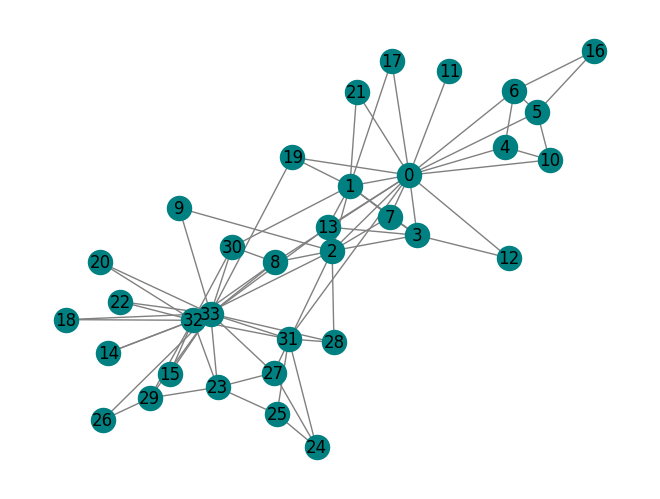

In [71]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color='teal', edge_color='gray')
# plt.savefig("karate_graph.pdf")

In [72]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [73]:
G.degree()[33]

17

In [74]:
G.degree(33)

17

# Random Graphs

In [75]:
bernoulli.rvs(p=0.2) # repeat it many times

0

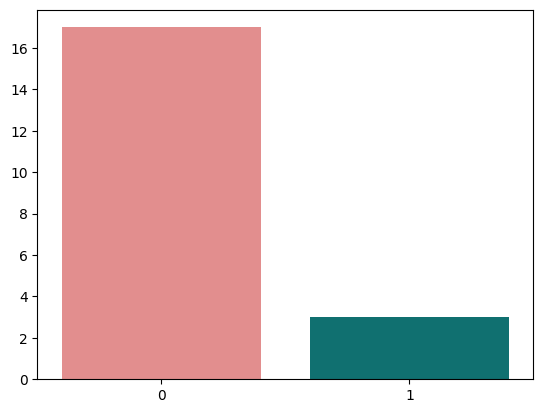

In [76]:
res = []
for i in range(0, 20):
  res.append(bernoulli.rvs(p=0.2))
  i += 1
counter = Counter(res)
sns.barplot(x=counter.keys(),
    hue=counter.keys(), y=counter.values(),
    palette=['lightcoral', 'teal'], legend=False)
plt.show()

## Erdos-Renyi (ER)
- create empty graph
- add all N nodes in the graph
- loop over all pairs of nodes
  - add an edge with probability p

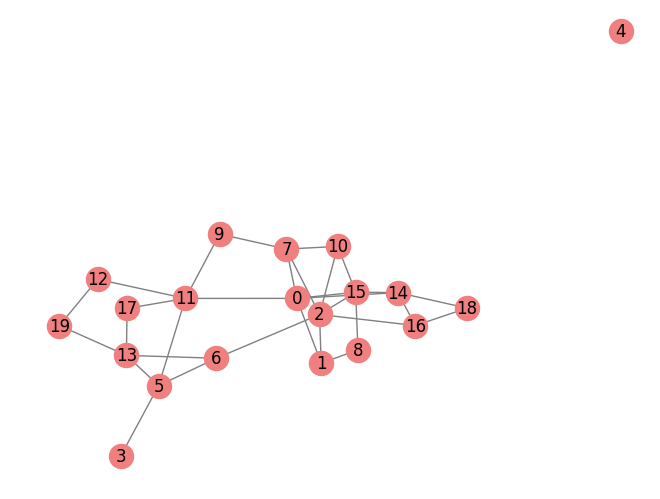

In [77]:
def er_graph(N, p):
  """
  Generate an ER graph.
  """
  g = nx.Graph()
  g.add_nodes_from(range(N))
  for i in g.nodes():
    for j in g.nodes():
      if i < j and bernoulli.rvs(p=p):
        g.add_edge(i, j)
  return g

N = 20
p = 0.2
g = er_graph(N, p)
nx.draw(g, with_labels=True, node_color='lightcoral', edge_color='gray')

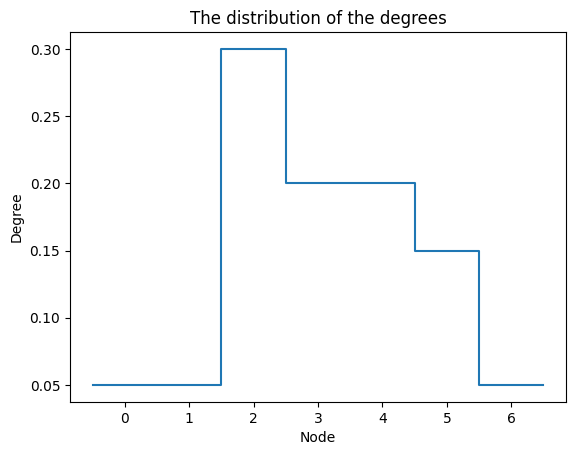

In [100]:
# plot the degree distribution for the ER graph
def plot_D_distribution(g):
  D = dict(g.degree())

  # Extract degree values for plotting
  degrees = list(D.values())

  # Plotting the degree distribution with the degrees on y-axis
  sns.histplot(x=degrees, discrete=True, stat="density", fill=False, element="step")
  plt.title("The distribution of the degrees")
  plt.xlabel("Node")
  plt.ylabel("Degree")

plot_D_distribution(g)

# Descriptive Statistics of Emprical Social Networks

**Data source**:
* Abhijit Banerjee et al. [The Diffusion of Microfinance](https://www.science.org/doi/10.1126/science.1236498). Science, 2013.

In [79]:
# get the files

import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
files_path = data_path / "village-relationships"

# If the folder doesn't exist, download it and prepare it...
if files_path.is_dir():
    print(f"{files_path} directory exists.")
else:
    print(f"Did not find {files_path} directory, creating one...")
    files_path.mkdir(parents=True, exist_ok=True)

    # Download files
    with open(data_path / "Village-Relationships.zip", "wb") as f:
        URL = 'https://github.com/mohamedyosef101/harvardx-python-for-research/raw/main/Network%20Analysis/Village-Relationships.zip'
        request = requests.get(URL)
        print("Downloading files...")
        f.write(request.content)

    # Unzip
    with zipfile.ZipFile(data_path / "Village-Relationships.zip", "r") as zip_ref:
        print("Unzipping...")
        zip_ref.extractall(files_path)
    print("It is done!")

data/village-relationships directory exists.


In [80]:
import numpy as np

path1 = '/content/data/village-relationships/adj_allVillageRelationships_vilno_1.csv'
path2 = '/content/data/village-relationships/adj_allVillageRelationships_vilno_2.csv'

A1 = np.loadtxt(path1, delimiter=',')
A2 = np.loadtxt(path2, delimiter=',')

G1 = nx.to_networkx_graph(A1)
G2 = nx.to_networkx_graph(A2)

In [84]:
D = dict(g.degree())
v = D.values()
list(v)

[5, 3, 6, 1, 0, 4, 3, 4, 2, 2, 3, 5, 2, 4, 4, 5, 3, 2, 2, 2]

In [89]:
def net_stats(G):
  D = dict(G.degree()).values()
  print(f"Number of nodes: {G.number_of_nodes()}",
        f"\nNumber of edges: {G.number_of_edges()}",
        f"\nAverage degree: {np.mean(list(D)):.2f}")

print(f"{net_stats(G1)}")
print(f"\n\n===============\n\n")
print(f"{net_stats(G2)}")

Number of nodes: 843 
Number of edges: 3405 
Average degree: 8.08
None




Number of nodes: 877 
Number of edges: 3063 
Average degree: 6.99
None


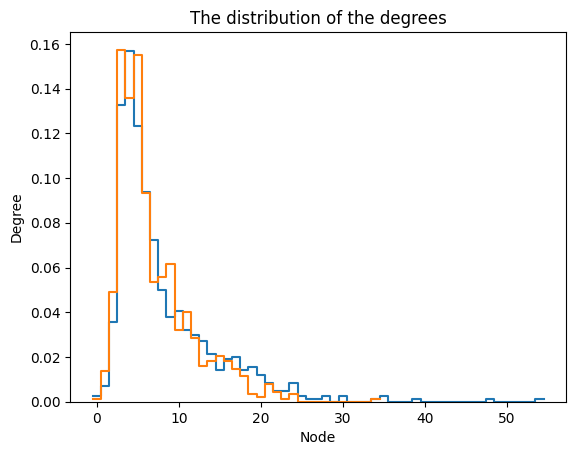

In [102]:
plot_D_distribution(G1)
plot_D_distribution(G2)